In [39]:
import numpy as np

file_path = "/Users/jloveles/Documents/relax/examples/tutorials/parameter_ranges/base.sh"
file_name = open(file_path, "r")
lines = file_name.readlines()

# Fault width
fault_width = 1

# List of dips to test
dips = np.arange(10, 100, 10)

# List of depth multipliers: 
# Fault depth will be calculated, then multiplied by depth multiplier to define thickness of elastic layer
depth_mults = np.arange(1, 4, 1).astype(float)

# List of viscosities to test
# Framed as gammadot = 1/Maxwell time
maxwell_times = np.array([1, 5, 10])
viscosities = 1./maxwell_times

for i in range(len(dips)):
    fault_depth = fault_width * np.sin(np.radians(dips[i]))
    if dips[i] == 90:
        rake = 0
    else:
        rake = -90
    for j in range(len(depth_mults)):
        thick = fault_depth * depth_mults[j]
        for k in range(len(viscosities)):
            sh_name = 'dip{:}_z{:0.2}_eta{:0.2}.sh'.format(dips[i], depth_mults[j], viscosities[k])
            output_name = f"./output_{sh_name[:-3]}".format()
            # Set output directory name
            lines[18] = f"WDIR={output_name}"
            # Set linear viscous parameters
            lines[78] = f"1 {thick} {viscosities[k]} 0.0\n".format()
            # Set fault parameters
            lines[95] = f'      1    1 -1  0  0      2     {fault_width}      0  {dips[i]}  {rake}\n'.format()
            new_file = open(file_path[0:-7] + sh_name, "w")
            new_file.writelines(lines)
            new_file.close()
            


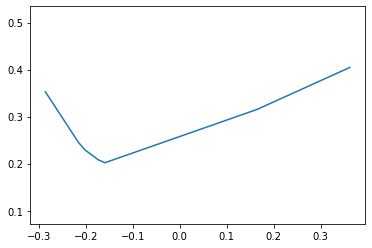